In [77]:
def implot(paths):
    paths = paths[:100]
    canvas = Image.new('RGB',(160,160),(50,50,50))
    
    x = range(10) * 10
    y = np.repeat(range(10),10)
    
    for i in range(100):
        try:
            im = Image.open(paths.iloc[i])
            im.thumbnail((16,16),Image.ANTIALIAS)
            canvas.paste(im,(x[i]*16,y[i]*16))
        except:
            pass
    
    return canvas

In [78]:
import pandas as pd
import numpy as np
from PIL import Image

In [79]:
df = pd.read_csv("Accra_2012.csv")

In [80]:
DIR = "/Users/damoncrockett/Desktop/2012/"

In [81]:
df['macpath'] = [DIR+item for item in df['basename']]

In [82]:
df['polarhue'] = [item * 360 for item in df.huepeak]

In [134]:
cnames = []
for i in range(len(df)):
    hue = df.polarhue.loc[i]
    if hue < 20:
        cnames.append("1red")
    elif 20 <= hue < 50:
        cnames.append("2orange")
    elif 50 <= hue < 70:
        cnames.append("3yellow")
    elif 70 <= hue < 160:
        cnames.append("4green")
    elif 160 <= hue < 200:
        cnames.append("5cyan")
    elif 200 <= hue < 260:
        cnames.append("6blue")
    elif 260 <= hue < 285:
        cnames.append("7purple")
    elif 285 <= hue < 330:
        cnames.append("8magenta")
    elif hue >= 330:
        cnames.append("1red")

In [135]:
df['color'] = cnames

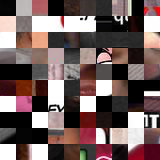

In [136]:
canvas = implot(df.macpath[df.color=="1red"])
canvas

In [137]:
df['valbin'] = pd.cut(df.val,10,labels=False)

In [138]:
df['satbin'] = pd.cut(df.sat,10,labels=False)

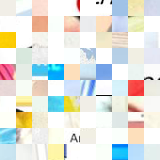

In [139]:
canvas = implot(df.macpath[df.valbin==9])
canvas

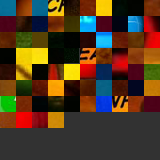

In [140]:
canvas = implot(df.macpath[df.satbin==9])
canvas

In [141]:
tmp = df[df.valbin > 2]
tmp = tmp[tmp.satbin > 2]

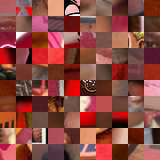

In [143]:
canvas = implot(tmp.macpath[tmp.color=="1red"])
canvas

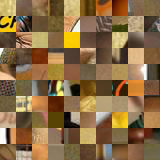

In [144]:
canvas = implot(tmp.macpath[tmp.color=="2orange"])
canvas

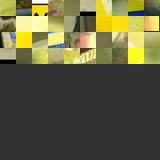

In [145]:
canvas = implot(tmp.macpath[tmp.color=="3yellow"])
canvas

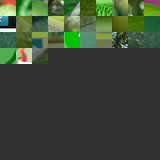

In [146]:
canvas = implot(tmp.macpath[tmp.color=="4green"])
canvas

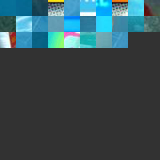

In [147]:
canvas = implot(tmp.macpath[tmp.color=="5cyan"])
canvas

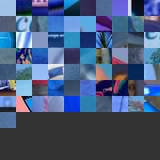

In [148]:
canvas = implot(tmp.macpath[tmp.color=="6blue"])
canvas

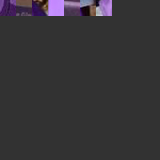

In [149]:
canvas = implot(tmp.macpath[tmp.color=="7purple"])
canvas

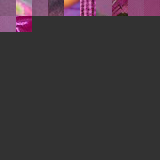

In [150]:
canvas = implot(tmp.macpath[tmp.color=="8magenta"])
canvas

In [151]:
df.valbin.value_counts(normalize="boolean").sort_index()

0    0.107066
1    0.112206
2    0.095503
3    0.099358
4    0.101071
5    0.098501
6    0.098929
7    0.102784
8    0.073662
9    0.110921
Name: valbin, dtype: float64

In [152]:
sum(df.valbin.value_counts(normalize="boolean"))

0.99999999999999989

In [153]:
df.color.value_counts(normalize="boolean").sort_index()

1red        0.265953
2orange     0.274518
3yellow     0.074090
4green      0.117773
5cyan       0.071949
6blue       0.147752
7purple     0.011135
8magenta    0.036831
Name: color, dtype: float64